## User Adaboost to classify cancer type

In [1]:
# necessary imports
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression #benchmark
from sklearn.model_selection import cross_val_score

np.random.seed(19)

In [2]:
data_folder = ""
data = pd.read_csv(os.path.join(data_folder, "breast_cancer.csv"))

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Target

In [4]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

## Filter out unnecessary information

In [6]:
data.drop('id',axis=1,inplace=True)
data.drop('Unnamed: 32',axis=1,inplace=True)

## Update target encoding

In [7]:
data['diagnosis'] = data['diagnosis'].apply(lambda x : +1 if x=='M' else -1)

## Summarize new data

In [9]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,-0.254833,0.967836,-1.000000,-1.000000,-1.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

C:\Users\Lisa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

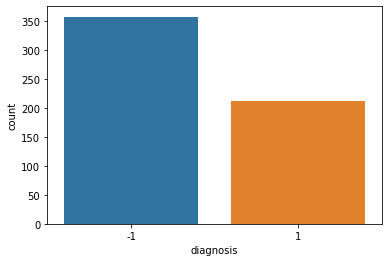

In [11]:
import seaborn as sns
sns.countplot(data['diagnosis'])

## Use only first 6 as an example

In [12]:
features = data.columns[1:7]
target = 'diagnosis'
features

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean'],
      dtype='object')

## EDA

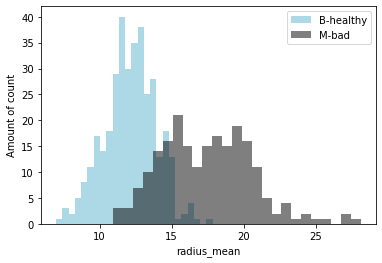

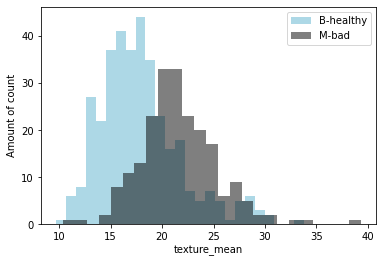

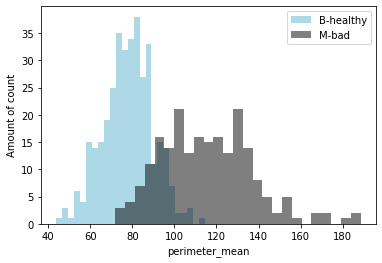

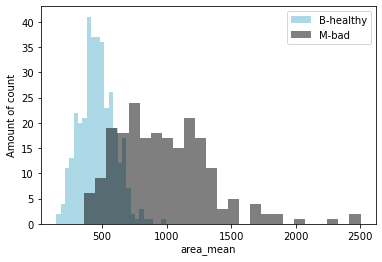

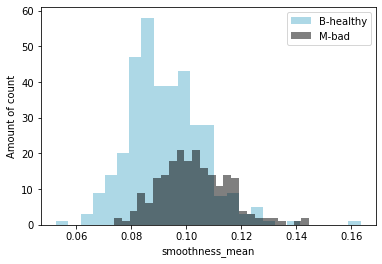

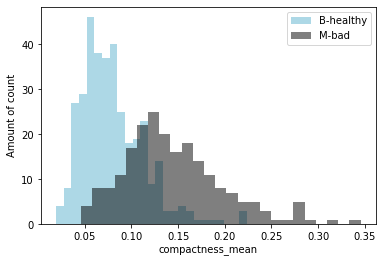

In [13]:
i = 0
for feature in features:

    bins = 25

    plt.hist(data[feature][data[target] == -1], bins=bins, color='lightblue', label= 'B-healthy', alpha=1)
    plt.hist(data[feature][data[target] == 1], bins=bins, color='k', label='M-bad', alpha=0.5)
    
    plt.xlabel(feature)
    plt.ylabel('Amount of count')
    
    plt.legend()
    
    plt.show()

In [14]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size=0.3)

In [15]:
trainX, trainY = train_data[data.columns[1:]], train_data[target]
testX, testY = test_data[data.columns[1:]], test_data[target]

## On logistic regression

In [16]:
logistic_model = LogisticRegression()
print("Logistic Regression performance: %f" % (cross_val_score(logistic_model, trainX, trainY, cv=8).mean()))

Logistic Regression performance: 0.947143


C:\Users\Lisa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lisa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

## On decision tree

In [17]:
tree_model = DecisionTreeClassifier()
print("Decision Tree performance: %f" % (cross_val_score(tree_model, trainX, trainY, cv=8).mean()))

Decision Tree performance: 0.906990


## On Adaboost

In [18]:
ada_model = AdaBoostClassifier(n_estimators=200)
print("Decision Tree performance: %f" % (cross_val_score(ada_model, trainX, trainY, cv=8).mean()))

Decision Tree performance: 0.967347


## On Testing

In [19]:
logistic_model = LogisticRegression()
logistic_model.fit(trainX, trainY)
print("Logistic Regression test performance: %f" % logistic_model.score(testX, testY))

tree_model = DecisionTreeClassifier()
tree_model.fit(trainX, trainY)
print("Decision Tree test performance: %f" % tree_model.score(testX, testY))

ada_model = AdaBoostClassifier(n_estimators=200)
ada_model.fit(trainX, trainY)
print("Adaboost test performance: %f" % ada_model.score(testX, testY))

C:\Users\Lisa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression test performance: 0.941520
Decision Tree test performance: 0.935673
Adaboost test performance: 0.953216


## Adaboost Implementation

In [20]:
from sklearn.base import BaseEstimator
class Adaboost(BaseEstimator):
    
    def __init__(self, M):
        self.M = M
        
    def fit(self, X, Y):
        self.models = []
        self.model_weights = []
        
        N, _ = X.shape
        alpha = np.ones(N) / N
        
        for m in range(self.M):
            tree = DecisionTreeClassifier(max_depth=2)
            tree.fit(X, Y, sample_weight=alpha)
            prediction = tree.predict(X)
            
            weighted_error = alpha.dot(prediction != Y)
            
            model_weight = 0.5 * (np.log(1 - weighted_error) - np.log(weighted_error))
            
            alpha = alpha * np.exp(-model_weight * Y * prediction)
            
            alpha = alpha / alpha.sum()
            
            self.models.append(tree)
            self.model_weights.append(model_weight)
            
    def predict(self, X):
        N, _ = X.shape
        result = np.zeros(N)
        for wt, tree in zip(self.model_weights, self.models):
            result += wt * tree.predict(X)
        
        return np.sign(result)
    
    def score(self, X, Y):
        prediction = self.predict(X)
        return np.mean(prediction == Y)

In [22]:
adamodel = Adaboost(200)
print("Adaboost model performance: %f" % (cross_val_score(adamodel, trainX.to_numpy().astype(np.float64), trainY.to_numpy().astype(np.float64), cv=8).mean()))

Adaboost model performance: 0.972449


In [23]:
adamodel.fit(trainX.to_numpy().astype(np.float64), trainY.to_numpy().astype(np.float64))
print("Adaboost model test performance: %f" % adamodel.score(testX.to_numpy().astype(np.float64), testY.to_numpy().astype(np.float64)))

Adaboost model test performance: 0.941520
